## Praktikum 9 Perbaikan kualitas citra 2
#### Lukman Hakim (2005013)

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

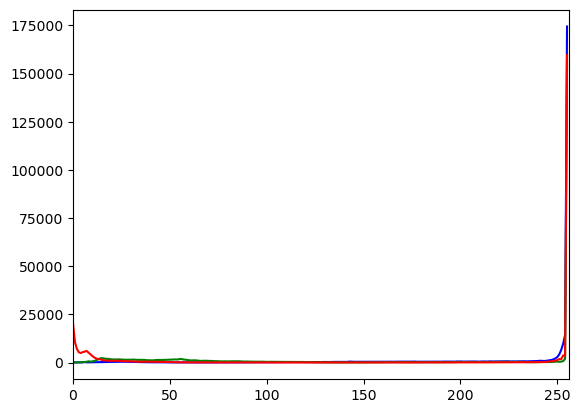

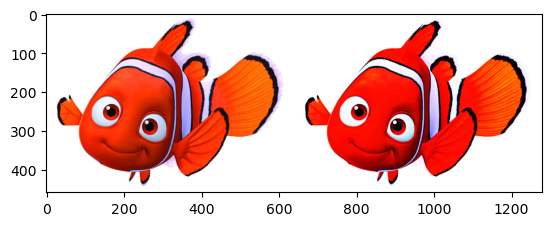

In [5]:
img = cv2.imread('nemo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
original = img.copy()
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
img = cv2.LUT(img, table)
# display histogram
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([original],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()
hasil = np.hstack((original, img))
# Tampilkan hasilnya
plt.imshow(hasil)
plt.show()

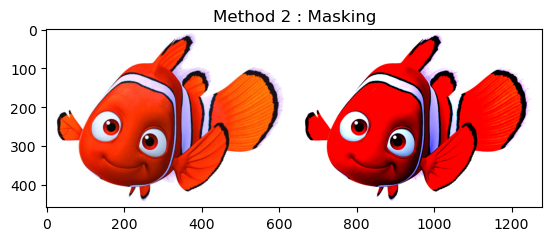

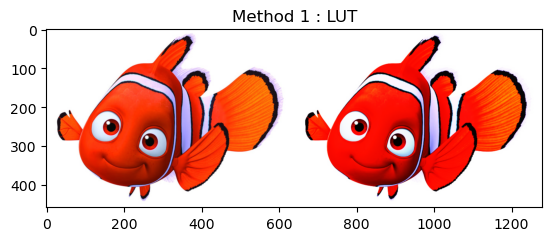

In [6]:
from PIL import Image
# proses layer Red
def masknormR(i):
    iI = i
    minI = 86
    maxI = 230
    minO = 0
    maxO = 255
    iO = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO
# proses layer green
def masknormG(i):
    iI = i
    minI = 90
    maxI = 225
    minO = 0
    maxO = 255
    iO = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO
# proses layer blue
def masknormB(i):
    iI = i
    minI = 100
    maxI = 210
    minO = 0
    maxO = 255
    iO = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO
# load gambar
img = Image.open("nemo.jpg")
# memisahkan layer RGB
layer = img.split()
# contrast stretching setiap layer RGB
normlayerR = layer[0].point(masknormR)
normlayerG = layer[1].point(masknormG)
normlayerB = layer[2].point(masknormB)
# menggabungkan gambar contrast stretched layer RGB
normImg = Image.merge("RGB", (normlayerR, normlayerG, normlayerB))

hasil2 = np.hstack((img, normImg))
# Tamp6ilkan hasilnya
plt.imshow(hasil2)
plt.title("Method 2 : Masking")
plt.show()
plt.imshow(hasil)
plt.title("Method 1 : LUT")
plt.show()

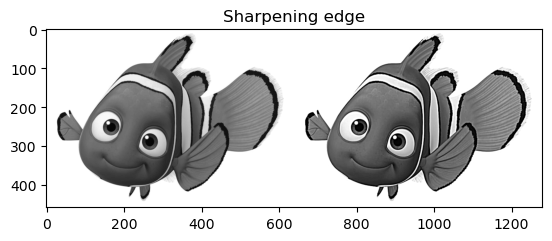

In [7]:
# Load gambar
img = cv2.imread('nemo.jpg',0)
cv2.imshow("Original", img)
# membuat matriks indentitas
mask = np.zeros( (9,9), np.float32)
mask[4,4] = 2.0
# masiking
boxFilter = np.ones( (9,9), np.float32) / 81.0
# Subtract the two:
mask = mask - boxFilter
output = cv2.filter2D(img, -1, mask)

hasil3 = np.hstack((img, output))
# Tamp6ilkan hasilnya
plt.imshow(hasil3, cmap= plt.get_cmap("gray"))
plt.title("Sharpening edge")
plt.show()